In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print('Hello World')
a,b = 3,4
print('Product of a and b is ', a*b)

Hello World
Product of a and b is  12


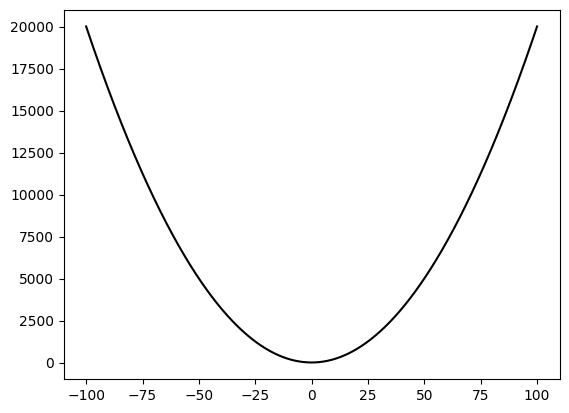

In [3]:
'''
commenting is essential to guide the user through the code
'''
a = np.linspace(-100,100,1000) #to create an array
b = 2*a**2 + 5
plt.plot(a,b,'-k')
plt.show()

In [10]:
from astropy.io import fits

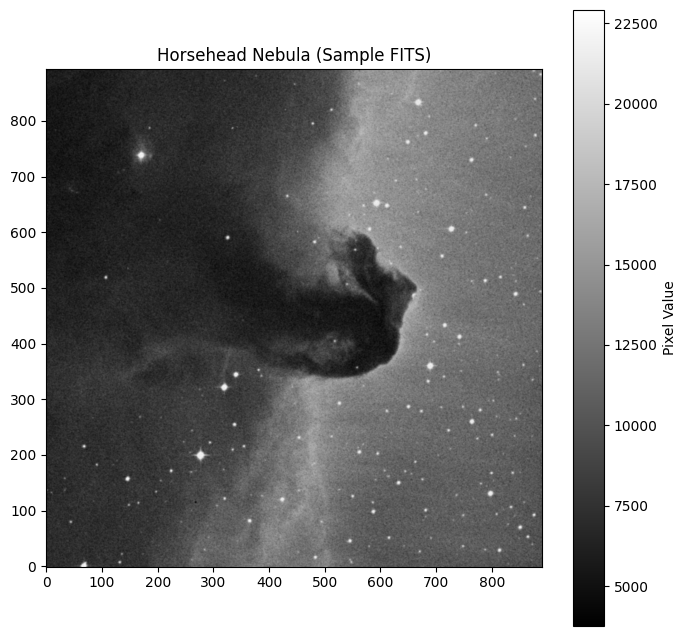

In [12]:
from astropy.io import fits
import urllib.request
import os
import matplotlib.pyplot as plt

# Define download path like your original code structure
file_dir = 'data/'
img_name = 'horsehead.fits'
url = 'http://data.astropy.org/tutorials/FITS-images/HorseHead.fits'

# Create 'data/' directory if it doesn't exist and download the FITS file
os.makedirs(file_dir, exist_ok=True)
urllib.request.urlretrieve(url, file_dir + img_name)

# Load the FITS file (::ext=0 typically holds image data)
img = fits.getdata(file_dir + img_name, ext=0)

# Plotting
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray', origin='lower')
plt.colorbar(label='Pixel Value')
plt.title('Horsehead Nebula (Sample FITS)')
plt.show()


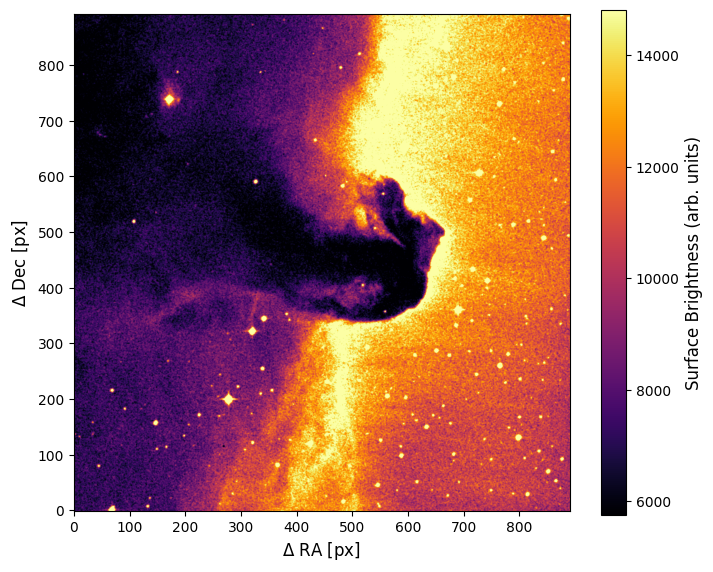

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Choose limits based on the data percentiles
vmin = np.percentile(img, 5)   # lower 5% brightness
vmax = np.percentile(img, 95)  # upper 5% brightness

fig = plt.figure(figsize=(8,8))
image = plt.imshow(img, origin='lower', vmin=vmin, vmax=vmax, cmap='inferno')
cbar = fig.colorbar(image, shrink=0.82)
cbar.set_label('Surface Brightness (arb. units)', rotation=90, fontsize=12)
plt.xlabel(r'$\Delta$ RA [px]', fontsize=12)
plt.ylabel(r'$\Delta$ Dec [px]', fontsize=12)
plt.show()

Modifications made:


*   Applied origin='lower' so the image orientation matches astronomical conventions (North up, East left).
*   Used cmap='inferno' to enhance visibility of faint structures in the nebula.
*   Added vmin and vmax to control the intensity scale and avoid the figure appearing entirely yellow.
*  Increased the figure size with plt.figure(figsize=(10, 10)) for better visual clarity.
*  Added a colorbar to represent flux values from the FITS data.




In [18]:
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.6 MB/s eta 0:00:00


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


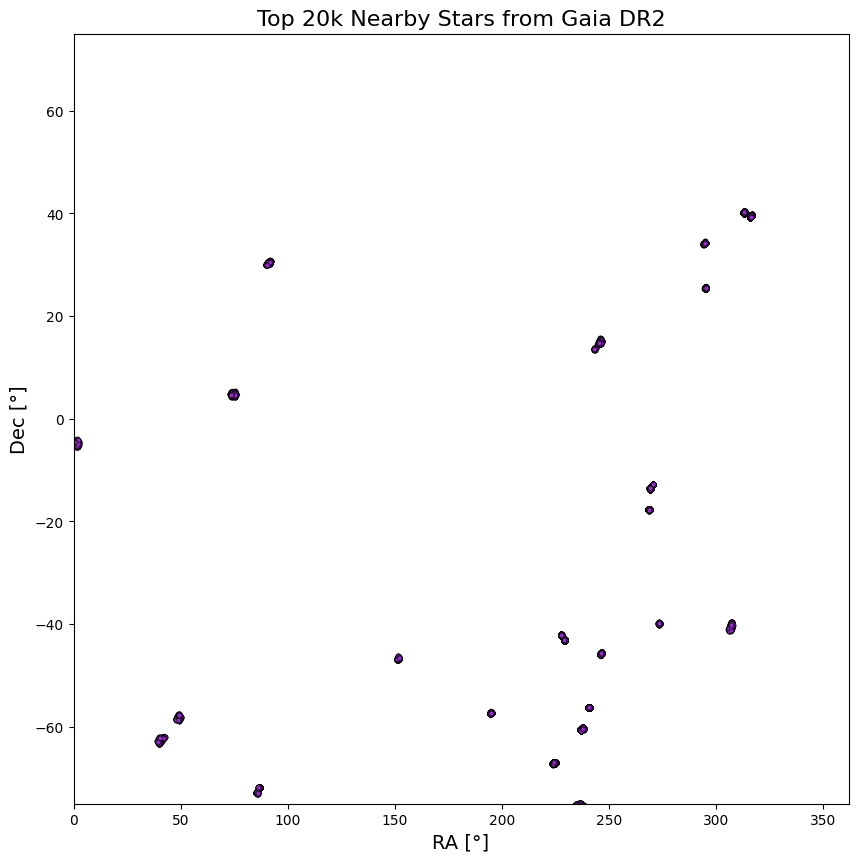

In [21]:
# Install astroquery for Gaia access
!pip install astroquery

# Import libraries
from astroquery.gaia import Gaia
import pandas as pd
import matplotlib.pyplot as plt

# Launch async query for 20,000 nearest stars from Gaia DR2
query = """
SELECT TOP 20000 ra, dec
FROM gaiadr2.gaia_source
ORDER BY parallax DESC
"""
job = Gaia.launch_job_async(query)
stellar = job.get_results().to_pandas()

# Plot RA vs Dec scatter plot
plt.figure(figsize=(10,10))
plt.scatter(stellar['ra'], stellar['dec'], alpha=0.8, s=12, lw=0.5, ec='k', color='darkorchid')
plt.xlim([0, 362])
plt.ylim([-75, 75])
plt.xlabel('RA [°]', fontsize=14)
plt.ylabel('Dec [°]', fontsize=14)
plt.title('Top 20k Nearby Stars from Gaia DR2', fontsize=16)
plt.show()


Gaia DR2 Nearest Stars Plot
Here I did the following:

*   Modified to directly query Gaia Archive instead of loading from a local CSV.
*   Added custom RA/Dec limits for a cleaner view.
*   Used darkorchid color and point size adjustments for better visualization.
*   Sorted by parallax to ensure nearest stars are selected.



